In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Settings
hours = 24  # Total hours in a day
samples_per_hour = 60  # Increase for finer granularity
total_samples = hours * samples_per_hour

# Time array representing each sample in the day
time = np.linspace(0, hours, total_samples)

# Parameters for the Gaussian function
mean = hours / 2  # Peak production at midday
std_dev = hours / 6  # Standard deviation to control the "width" of the sunlight hours

# Gaussian function to simulate solar production
solar_production = np.exp(-((time - mean) ** 2) / (2 * std_dev ** 2))

# Normalize to simulate a maximum production capacity (e.g., 100%)
solar_production_normalized = solar_production / max(solar_production)

# Plot the solar production curve
plt.figure(figsize=(10, 6))
plt.plot(time, solar_production_normalized * 100, label='Solar Production (%)')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Production Capacity (%)')
plt.title('Simulated Solar Production over One Day')
plt.grid(True)
plt.legend()
plt.show()

[0, 0, 0, 0, 0, 0, 0.0, 25.88, 50.0, 70.71, 86.6, 96.59, 100.0, 96.59, 86.6, 70.71, 50.0, 25.88, 0, 0, 0, 0, 0, 0]


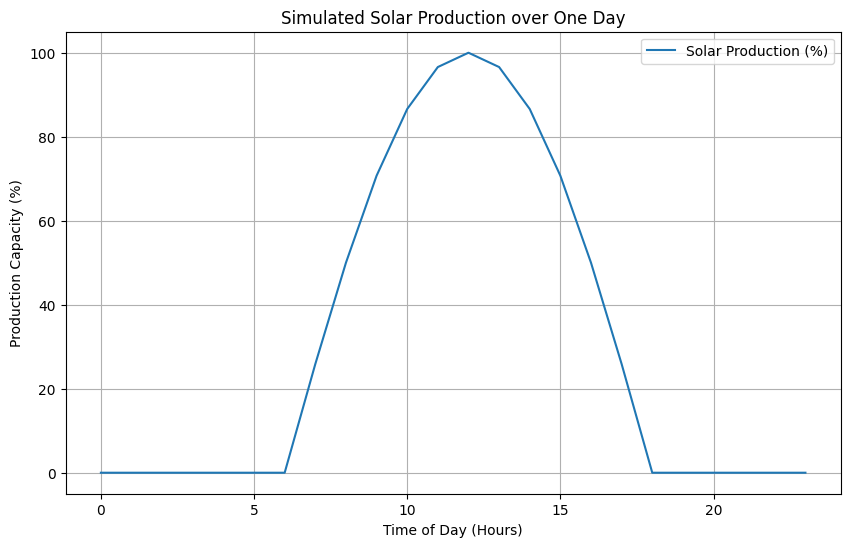

In [4]:
import math

# Parameters
hours_in_day = 24
sunrise = 6
sunset = 18
peak_production = 100  # Arbitrary unit of peak production

# Generate solar production values
solar_production = [0] * hours_in_day  # Initialize list with 0s
for hour in range(sunrise, sunset):
    # Map the hour to a value between 0 and π
    x = (hour - sunrise) / (sunset - sunrise) * math.pi
    # Calculate production using a sine wave, peaking at noon
    production = math.sin(x) * peak_production
    solar_production[hour] = production

# Round values for readability
solar_production = [round(val, 2) for val in solar_production]

print(solar_production)
# Plot the solar production curve
plt.figure(figsize=(10, 6))
plt.plot( solar_production , label='Solar Production (%)')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Production Capacity (%)')
plt.title('Simulated Solar Production over One Day')
plt.grid(True)
plt.legend()
plt.show()

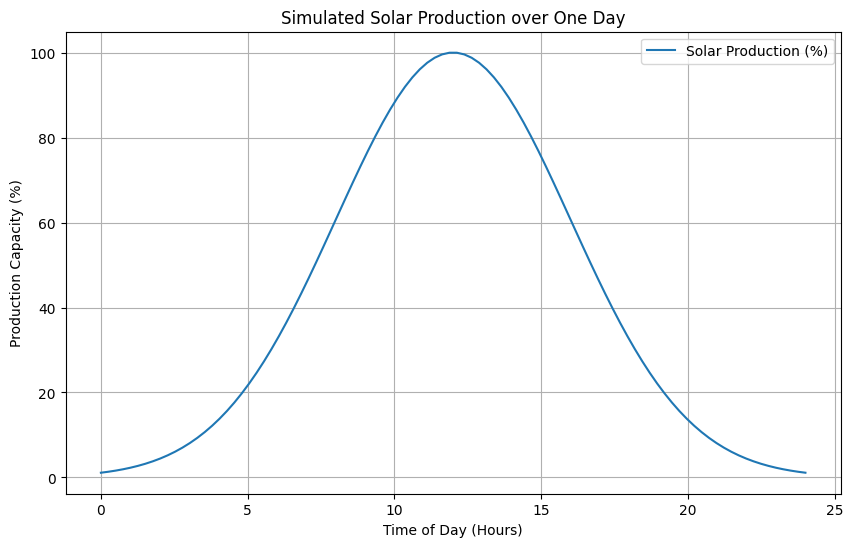

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Settings
hours = 24  # Total hours in a day
samples_per_hour = 4  # 15 minutes interval
total_samples = hours * samples_per_hour

# Time array representing each sample in the day
time = np.linspace(0, hours, total_samples)

# Parameters for the Gaussian function
mean = hours / 2  # Peak production at midday
std_dev = hours / 6  # Standard deviation to control the "width" of the sunlight hours

# Gaussian function to simulate solar production
solar_production = np.exp(-((time - mean) ** 2) / (2 * std_dev ** 2))

# Normalize to simulate a maximum production capacity (e.g., 100%)
solar_production_normalized = solar_production / max(solar_production)

# Plot the solar production curve
plt.figure(figsize=(10, 6))
plt.plot(time, solar_production_normalized * 100, label='Solar Production (%)')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Production Capacity (%)')
plt.title('Simulated Solar Production over One Day')
plt.grid(True)
plt.legend()
plt.show()


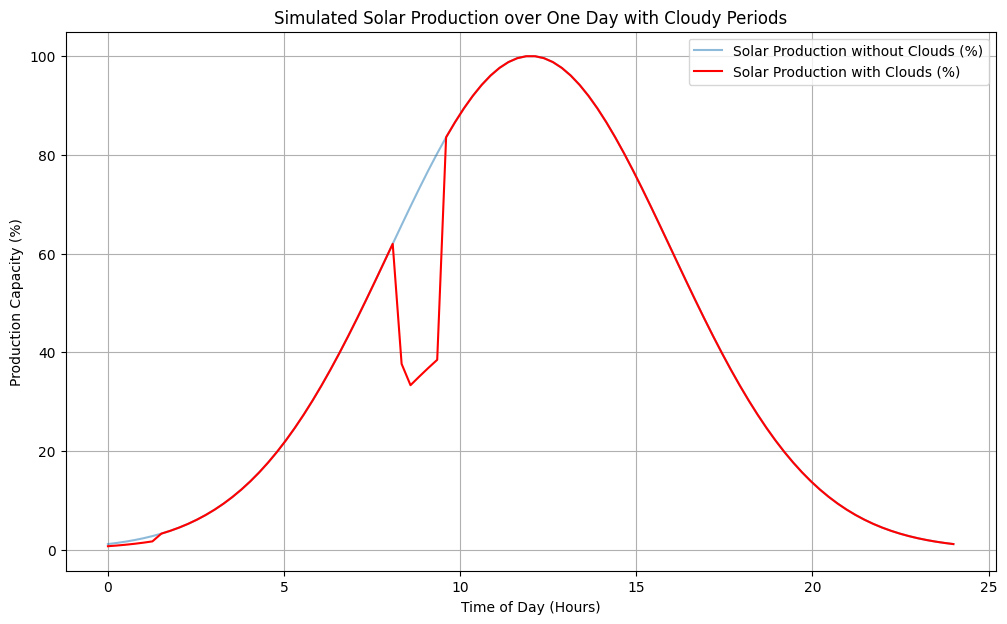

In [7]:
import random

# Function to simulate random cloudy periods
def simulate_cloudy_periods(solar_production, total_samples, num_periods=3, max_drop_percentage=0.5):
    """
    Simulates random cloudy periods by reducing the solar production randomly
    for a specified number of periods and by a maximum drop percentage.
    """
    modified_production = solar_production.copy()
    for _ in range(num_periods):
        # Randomly choose a start time for the cloudy period
        start_sample = random.randint(0, total_samples - 1)
        # Randomly determine the duration of the cloudy period (in samples)
        duration = random.randint(total_samples // 20, total_samples // 10)
        # Randomly determine the drop percentage for this cloudy period
        drop_percentage = random.uniform(0.1, max_drop_percentage)
        # Apply the drop in production for the duration of the cloudy period
        end_sample = min(start_sample + duration, total_samples)
        modified_production[start_sample:end_sample] *= (1 - drop_percentage)
    return modified_production

# Apply random cloudy periods to the solar production
solar_production_with_clouds = simulate_cloudy_periods(solar_production_normalized, total_samples)

# Plot the solar production curve with cloudy periods
plt.figure(figsize=(12, 7))
plt.plot(time, solar_production_normalized * 100, label='Solar Production without Clouds (%)', alpha=0.5)
plt.plot(time, solar_production_with_clouds * 100, label='Solar Production with Clouds (%)', color='red')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Production Capacity (%)')
plt.title('Simulated Solar Production over One Day with Cloudy Periods')
plt.grid(True)
plt.legend()
plt.show()


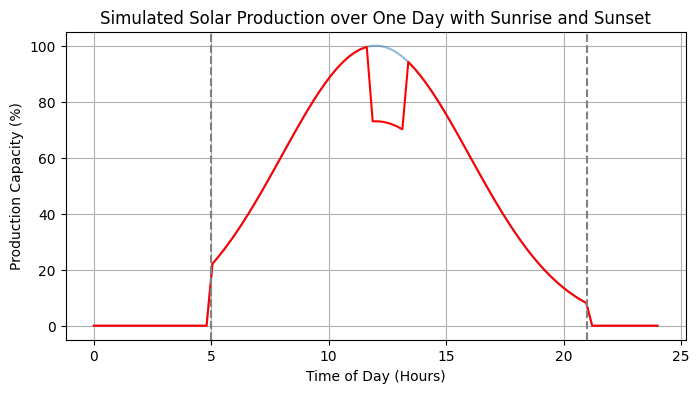

In [22]:
# Updated settings with sunrise and sunset variables
sunrise = 5  # Sunrise at 6 AM
sunset = 21  # Sunset at 6 PM
samples_per_hour = 4  # 15 minutes interval
total_samples = hours * samples_per_hour

# Time array representing each sample in the day
time = np.linspace(0, hours, total_samples)

# Adjust solar production to account for sunrise and sunset
def adjust_for_sunrise_sunset(time, production, sunrise, sunset):
    """
    Adjusts the solar production to be zero before sunrise and after sunset.
    """
    adjusted_production = production.copy()
    for i, t in enumerate(time):
        if t < sunrise or t > sunset:
            adjusted_production[i] = 0
    return adjusted_production

# Original solar production without cloudy periods for reference
solar_production = np.exp(-((time - mean) ** 2) / (2 * std_dev ** 2))
solar_production_normalized = solar_production / max(solar_production)
solar_production_adjusted = adjust_for_sunrise_sunset(time, solar_production_normalized, sunrise, sunset)

# Apply random cloudy periods to the adjusted solar production
solar_production_with_clouds_adjusted = simulate_cloudy_periods(solar_production_adjusted, total_samples)

# Plot the adjusted solar production curve with cloudy periods
plt.figure(figsize=(8, 4))
plt.plot(time, solar_production_adjusted * 100, label='Adjusted Solar Production without Clouds (%)', alpha=0.5)
plt.plot(time, solar_production_with_clouds_adjusted * 100, label='Adjusted Solar Production with Clouds (%)', color='red')
plt.axvline(x=sunrise, color='grey', linestyle='--', label='Sunrise')
plt.axvline(x=sunset, color='grey', linestyle='--', label='Sunset')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Production Capacity (%)')
plt.title('Simulated Solar Production over One Day with Sunrise and Sunset')
plt.grid(True)
# plt.legend()
plt.show()

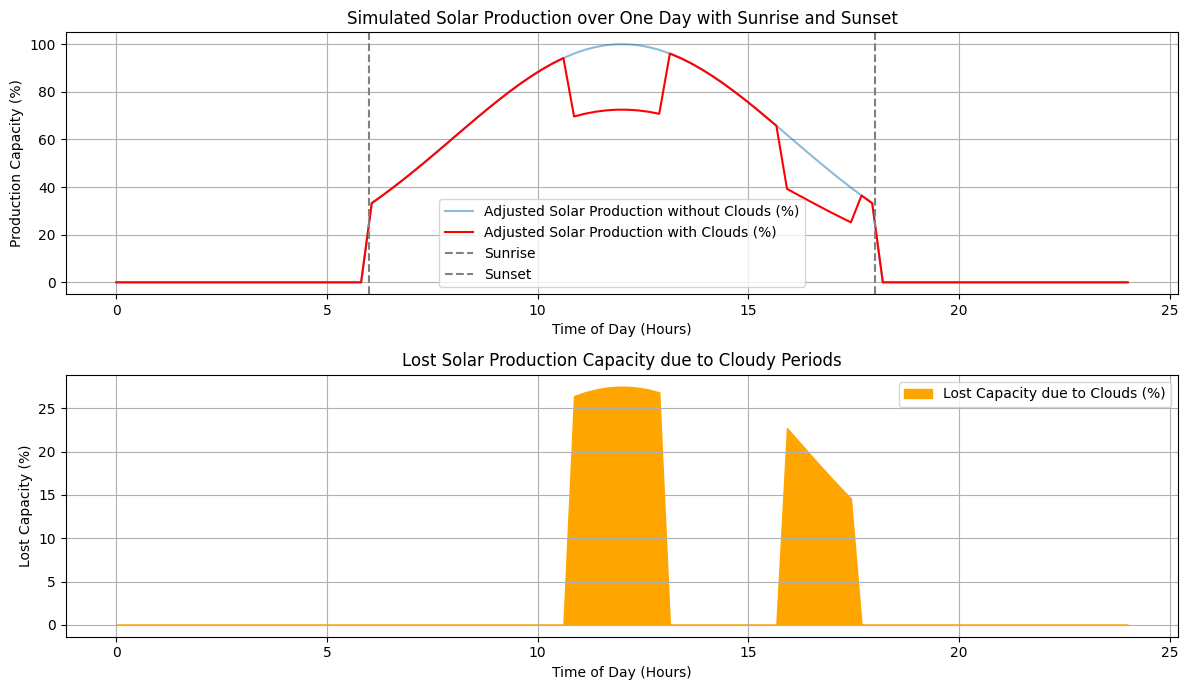

In [21]:
# Calculate the lost capacity due to cloudy periods
lost_capacity = (solar_production_adjusted - solar_production_with_clouds_adjusted) * 100

# Plot the original solar production curve with cloudy periods
plt.figure(figsize=(12, 7))
plt.subplot(2, 1, 1)  # First plot
plt.plot(time, solar_production_adjusted * 100, label='Adjusted Solar Production without Clouds (%)', alpha=0.5)
plt.plot(time, solar_production_with_clouds_adjusted * 100, label='Adjusted Solar Production with Clouds (%)', color='red')
plt.axvline(x=sunrise, color='grey', linestyle='--', label='Sunrise')
plt.axvline(x=sunset, color='grey', linestyle='--', label='Sunset')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Production Capacity (%)')
plt.title('Simulated Solar Production over One Day with Sunrise and Sunset')
plt.grid(True)
plt.legend()

# Plot showing only the lost capacity due to cloudy periods
plt.subplot(2, 1, 2)  # Second plot
plt.fill_between(time, 0, lost_capacity, color='orange', label='Lost Capacity due to Clouds (%)')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Lost Capacity (%)')
plt.title('Lost Solar Production Capacity due to Cloudy Periods')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [23]:
import xml.etree.ElementTree as ET

# Create the root element
root = ET.Element("data")

# Add a child element
child = ET.SubElement(root, "child")
child.text = "content"

# Convert the XML tree to a string
tree = ET.ElementTree(root)
import io
stream = io.BytesIO()
tree.write(stream, encoding='utf-8', xml_declaration=False, short_empty_elements=True)

# To ensure no whitespace, we decode and then remove unnecessary spaces
xml_str = stream.getvalue().decode('utf-8').replace('\n', '').replace('\t', '')

print(xml_str)


<data><child>content</child></data>


In [39]:
params=[
    (110, 150000), 
    (120, 130000),
    (130, 115000),
    (210, 160000),
    (220, 100000),
    (310, 35000)]

In [40]:
sum=0
for p in params:
    sum+=p[1]
sum

690000

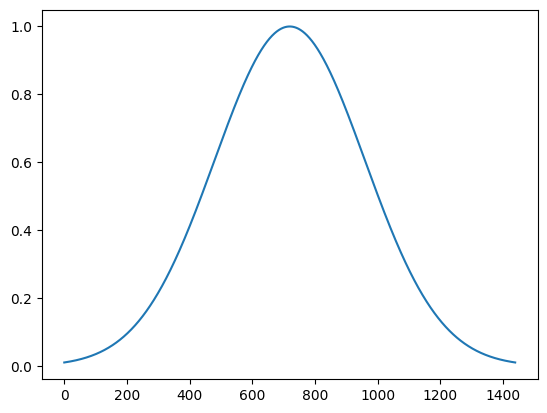

In [48]:
def solar_production():
    # Settings
    hours = 24  # Total hours in a day
    samples_per_hour = 60  # Increase for finer granularity
    total_samples = hours * samples_per_hour
    
    # Time array representing each sample in the day
    time = np.linspace(0, hours, total_samples)
    
    # Parameters for the Gaussian function
    mean = hours / 2  # Peak production at midday
    std_dev = hours / 6  # Standard deviation to control the "width" of the sunlight hours
    
    # Gaussian function to simulate solar production
    solar_production = np.exp(-((time - mean) ** 2) / (2 * std_dev ** 2))
    
    # Normalize to simulate a maximum production capacity (e.g., 100%)
    solar_production_normalized = solar_production / max(solar_production)
    return solar_production_normalized

plt.plot(solar_production());
    